# IIA 2024 - Aprendizaje Automatizado
### Lucas Poma
## Trabajo Practico 2

## Definiciones

In [8]:
import numpy as np
import sklearn as sk
import pandas as pd
import copy
import matplotlib.pyplot as plt
import math
from sklearn.naive_bayes import GaussianNB

### Redes Neuronales

In [17]:
N2 = 20
learning_rate = 0.02
momentum = 0.85
gamma = 0.00001
epochs = 30
evals = 300

In [4]:
from sklearn.neural_network import MLPClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [5]:
def MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma):
    return MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=gamma, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

In [6]:
def error_clasificacion(y, y_pred):
    return sk.metrics.zero_one_loss(y, y_pred)

def entrenar_red_peso(red, evaluaciones, X_train, y_train, X_test, y_test):
    error_train = []
    error_test = []
    weight_sum = []

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        weights = red.coefs_
        weight_sum.append(sum(np.sum(np.square(w)) for w in weights))
        error_train.append(error_clasificacion(y_train, red.predict(X_train)))
        error_test.append(error_clasificacion(y_test, red.predict(X_test)))

    return red, error_train, error_test, weight_sum

### Arboles

In [5]:
from sklearn.tree import DecisionTreeClassifier

## Ejercicio 1

### Setup

In [6]:
dimensiones = [2, 4, 8, 16, 32]
overlap = 0.78
testSamples = 10000
dataParalelasTree = []
dataDiagonalesTree = []
dataParalelasRed = []
dataDiagonalesRed = []
dataParalelasBayes = []
dataDiagonalesBayes = []

### Diagonales

In [8]:
def diagonales(n, d, C):
  half = int(n/2)

  mClass0 = -np.ones(d)
  mClass1 = np.ones(d)
  covM = np.identity(d) * (C**2 * d)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

In [9]:
for dimension in dimensiones:
    testDiagonales10000 = diagonales(testSamples, dimension, overlap)
    X_test = testDiagonales10000.drop(columns=['class'])
    y_test = testDiagonales10000['class']

    for conjunto in range(0,20):
        dfDiagonales = diagonales(250, dimension, overlap)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']

        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        dataDiagonalesTree.append([dimension, conjunto, errTest, errEntrenamiento])

        clasif = MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma)
        best_red, _, _, _ = entrenar_red_peso(clasif, evals, X, y, X_test, y_test)
        errTest = error_clasificacion(y_test, best_red.predict(X_test))
        errEntrenamiento = error_clasificacion(y, best_red.predict(X))
        dataDiagonalesRed.append([dimension, conjunto, errTest, errEntrenamiento])

        clfb = GaussianNB()
        clfb.fit(X, y)
        errTest = 1 - clfb.score(X_test, y_test)
        errEntrenamiento = 1 - clfb.score(X, y)
        dataDiagonalesBayes.append([dimension, conjunto, errTest, errEntrenamiento])

### Paralelas

In [10]:
def paralelas(n, d, C):
  half = int(n/2)

  mClass0 = np.zeros(d)
  mClass0[0] = 1
  mClass1 = np.zeros(d)
  mClass1[0] = -1
  covM = np.identity(d) * (C**2)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

In [11]:
for dimension in dimensiones:
    testParalelas10000 = paralelas(testSamples, dimension, overlap)
    X_test = testParalelas10000.drop(columns=['class'])
    y_test = testParalelas10000['class']

    for conjunto in range(0,20):
        dfParalelas = paralelas(250, dimension, overlap)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        dataParalelasTree.append([dimension, conjunto, errTest, errEntrenamiento])

        clasif = MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma)
        best_red, _, _, _ = entrenar_red_peso(clasif, evals, X, y, X_test, y_test)
        errTest = error_clasificacion(y_test, best_red.predict(X_test))
        errEntrenamiento = error_clasificacion(y, best_red.predict(X))
        dataParalelasRed.append([dimension, conjunto, errTest, errEntrenamiento])

        clfb = GaussianNB()
        clfb.fit(X, y)
        errTest = 1 - clfb.score(X_test, y_test)
        errEntrenamiento = 1 - clfb.score(X, y)
        dataParalelasBayes.append([dimension, conjunto, errTest, errEntrenamiento])

### Resultados

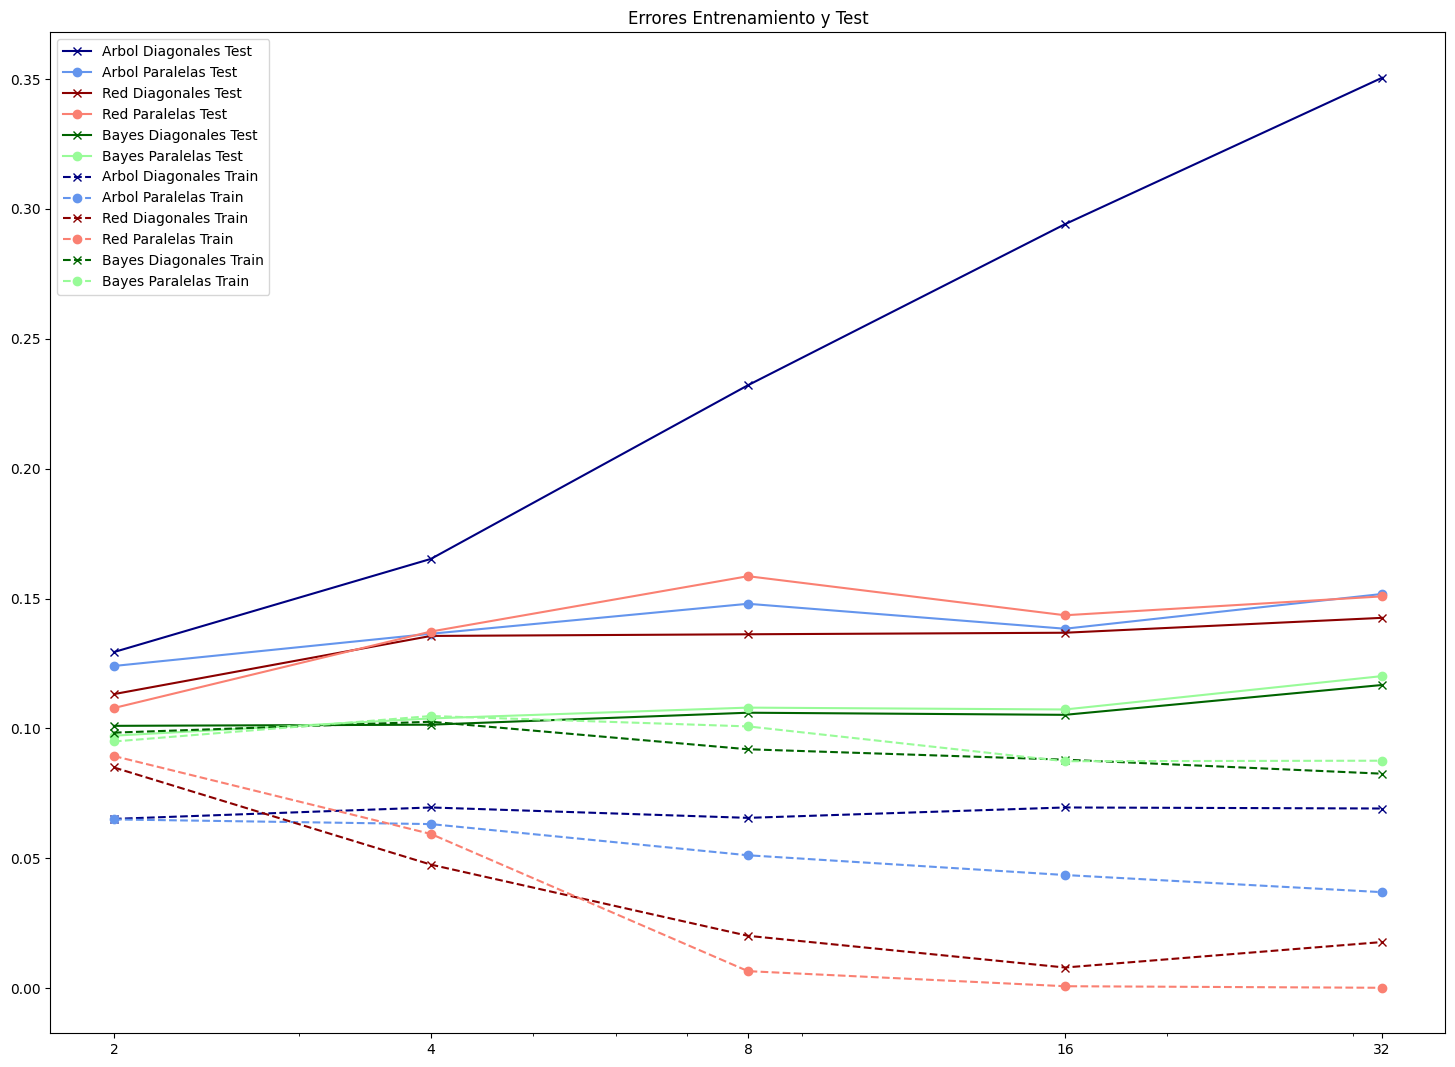

In [12]:
dfDiagonalesTree = pd.DataFrame(dataDiagonalesTree, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento'])
dfParalelasTree = pd.DataFrame(dataParalelasTree, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento'])
promsErrTestDiagonalesTree = dfDiagonalesTree.groupby('dimension')['errTest'].mean()
promsErrTestParalelasTree = dfParalelasTree.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonalesTree = dfDiagonalesTree.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelasTree = dfParalelasTree.groupby('dimension')['errEntrenamiento'].mean()

dfDiagonalesRed = pd.DataFrame(dataDiagonalesRed, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento'])
dfParalelasRed = pd.DataFrame(dataParalelasRed, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento'])
promsErrTestDiagonalesRed = dfDiagonalesRed.groupby('dimension')['errTest'].mean()
promsErrTestParalelasRed = dfParalelasRed.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonalesRed = dfDiagonalesRed.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelasRed = dfParalelasRed.groupby('dimension')['errEntrenamiento'].mean()

dfDiagonalesBayes = pd.DataFrame(dataDiagonalesBayes, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento'])
dfParalelasBayes = pd.DataFrame(dataParalelasBayes, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento'])
promsErrTestDiagonalesBayes = dfDiagonalesBayes.groupby('dimension')['errTest'].mean()
promsErrTestParalelasBayes = dfParalelasBayes.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonalesBayes = dfDiagonalesBayes.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelasBayes = dfParalelasBayes.groupby('dimension')['errEntrenamiento'].mean()

plt.figure(figsize=(18, 13))

plt.plot(dimensiones, promsErrTestDiagonalesTree, c='navy', label='Arbol Diagonales Test', marker='x', linestyle="-")
plt.plot(dimensiones, promsErrTestParalelasTree, c='cornflowerblue', label='Arbol Paralelas Test', marker='o', linestyle="-")
plt.plot(dimensiones, promsErrTestDiagonalesRed, c='darkred', label='Red Diagonales Test', marker='x', linestyle="-")
plt.plot(dimensiones, promsErrTestParalelasRed, c='salmon', label='Red Paralelas Test', marker='o', linestyle="-")
plt.plot(dimensiones, promsErrTestDiagonalesBayes, c='darkgreen', label='Bayes Diagonales Test', marker='x', linestyle="-")
plt.plot(dimensiones, promsErrTestParalelasBayes, c='palegreen', label='Bayes Paralelas Test', marker='o', linestyle="-")

plt.plot(dimensiones, promsErrEntrenamientoDiagonalesTree, c='navy', label='Arbol Diagonales Train', marker='x', linestyle="--")
plt.plot(dimensiones, promsErrEntrenamientoParalelasTree, c='cornflowerblue', label='Arbol Paralelas Train', marker='o', linestyle="--")
plt.plot(dimensiones, promsErrEntrenamientoDiagonalesRed, c='darkred', label='Red Diagonales Train', marker='x', linestyle="--")
plt.plot(dimensiones, promsErrEntrenamientoParalelasRed, c='salmon', label='Red Paralelas Train', marker='o', linestyle="--")
plt.plot(dimensiones, promsErrEntrenamientoDiagonalesBayes, c='darkgreen', label='Bayes Diagonales Train', marker='x', linestyle="--")
plt.plot(dimensiones, promsErrEntrenamientoParalelasBayes, c='palegreen', label='Bayes Paralelas Train', marker='o', linestyle="--")

plt.legend()
plt.xscale('log')
plt.title('Errores Entrenamiento y Test')
plt.xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

plt.show()

## Ejercicio 2

### Dos Elipses

In [18]:
csv = pd.read_csv('DataSets/dos_elipses.data', names=['dim_0', 'dim_1', 'class']).sample(n=500)
X = csv.drop(columns=['class'])
y = csv['class']

csv = pd.read_csv('DataSets/dos_elipses.test', names=['dim_0', 'dim_1', 'class']).sample(n=2000)
X_test = csv.drop(columns=['class'])
y_test = csv['class']

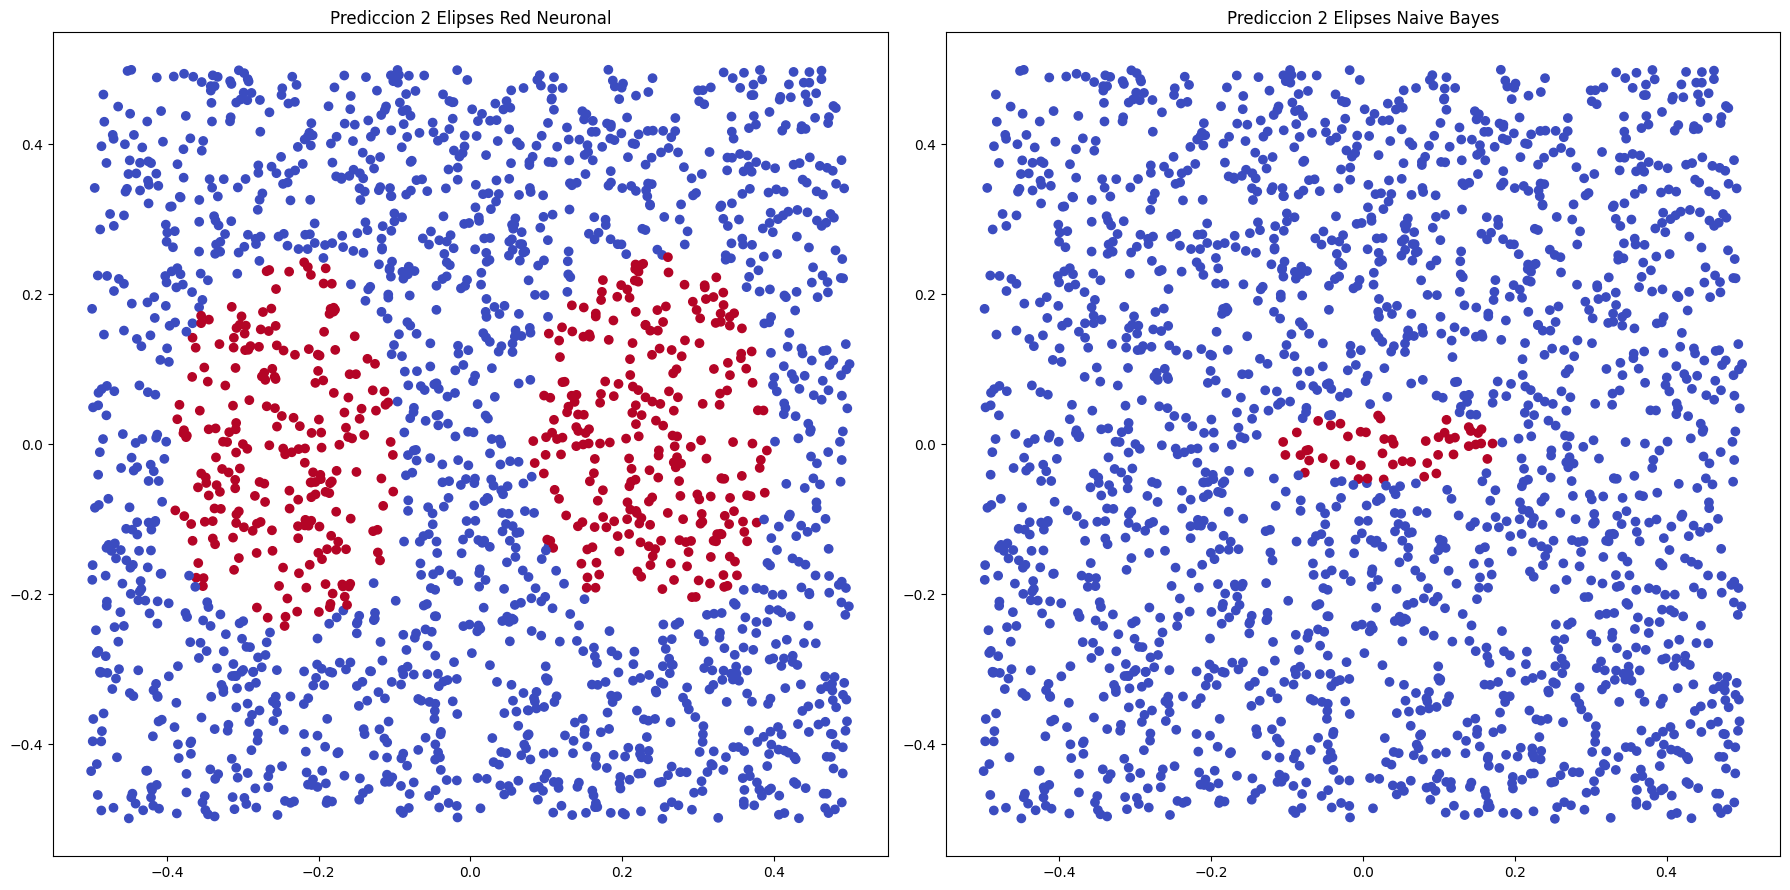

In [19]:
clasif = MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma)
best_red, error_train, error_val, error_test = entrenar_red_peso(clasif, evals, X, y, X_test, y_test)

fig, axs = plt.subplots(1, 2, figsize=(18, 9))
ax = axs[0]
ax.scatter(X_test['dim_0'], X_test['dim_1'], c=best_red.predict(X_test), cmap='coolwarm')
ax.set_title(f'Prediccion 2 Elipses Red Neuronal')

clfb = GaussianNB()
clfb.fit(X, y)
ax = axs[1]
ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clfb.predict(X_test), cmap='coolwarm')
ax.set_title(f'Prediccion 2 Elipses Naive Bayes')

plt.tight_layout()
plt.show()

### Espirales

In [67]:
def inside_circle(x,y):
  return np.linalg.norm([x,y]) <= 1

def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def in_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def in_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    for i in [1, 3, 5, 7]:
        if in_curve(rho, theta, i):
            return True
    return False

def espirales(n):
  half = int(n/2)
  bothClass = []
  countClass0 = 0
  countClass1 = 0

  while (countClass0 < half or countClass1 < n-half):
    gen = np.random.uniform(-1,1,size=(half,2))
    for (x,y) in gen:
      if (inside_circle(x,y)):
        if (in_curves(x,y)):
          if (countClass0 < half):
            bothClass.append([x,y,0])
            countClass0 += 1
        else:
          if (countClass1 < n - half):
            bothClass.append([x,y,1])
            countClass1 += 1
  df = pd.DataFrame(bothClass, columns=['dim_0', 'dim_1', 'class'])
  return df

In [68]:
espiralesTrain = espirales(600)
espiralesTest = espirales(2000)

X = espiralesTrain.drop(columns=['class'])
y = espiralesTrain['class']

X_test = espiralesTest.drop(columns=['class'])
y_test = espiralesTest['class']

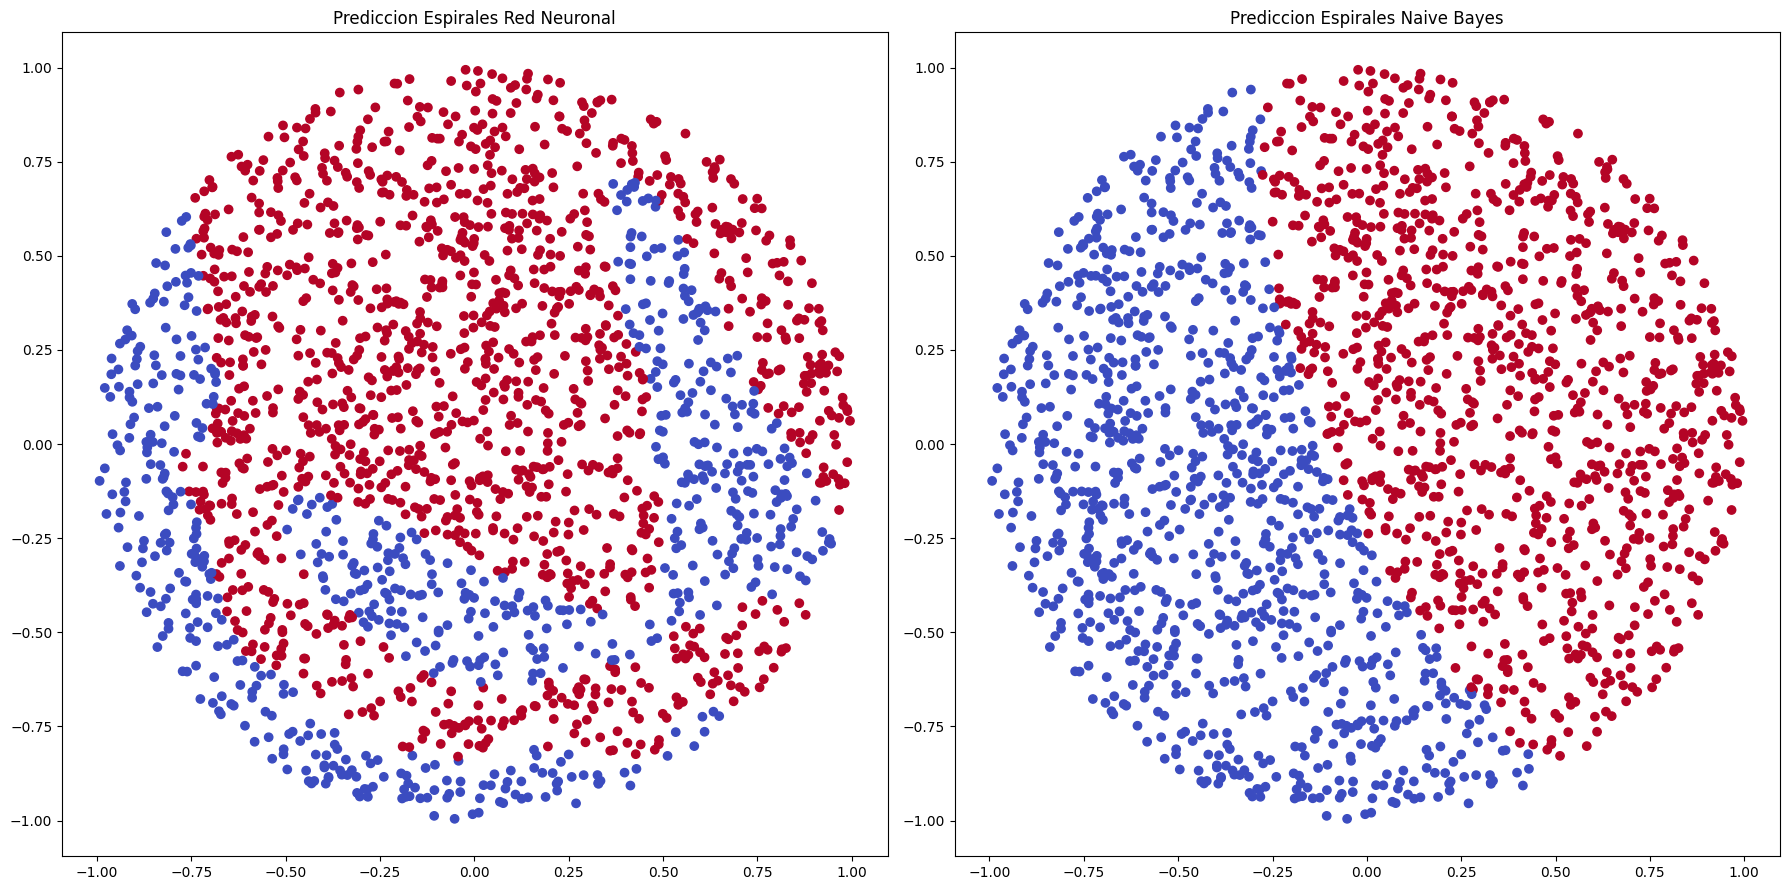

In [21]:
clasif = MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma)
best_red, error_train, error_val, error_test = entrenar_red_peso(clasif, evals, X, y, X_test, y_test)

fig, axs = plt.subplots(1, 2, figsize=(18, 9))
ax = axs[0]
ax.scatter(X_test['dim_0'], X_test['dim_1'], c=best_red.predict(X_test), cmap='coolwarm')
ax.set_title(f'Prediccion Espirales Red Neuronal')

clfb = GaussianNB()
clfb.fit(X, y)
ax = axs[1]
ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clfb.predict(X_test), cmap='coolwarm')
ax.set_title(f'Prediccion Espirales Naive Bayes')

plt.tight_layout()
plt.show()

## Ejercicio 3

In [83]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
bins_list = [2*x for x in range(1, 30)]

In [84]:
def error_clasificacion(y, y_pred):
    return sk.metrics.zero_one_loss(y, y_pred)

def entrenar_bayes_disc(X_train, y_train, X_val, y_val, X_test, y_test, bins_list):
    error_val = []
    error_train = []
    error_test = []
    min_error_val = float('inf')

    for bins in bins_list:
        discretizador = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
        clf = CategoricalNB(min_categories=bins)
        X_discreto = discretizador.fit_transform(X_train)
        clf.fit(X_discreto,y_train)
        aux_err_val = error_clasificacion(y_val, clf.predict(discretizador.transform(X_val)))

        if aux_err_val < min_error_val:
            min_error_val = aux_err_val
            best_bayes = copy.deepcopy(clf)
            best_discretizador = copy.deepcopy(discretizador)

        error_val.append(aux_err_val)
        error_train.append(error_clasificacion(y_train, clf.predict(discretizador.transform(X_train))))
        error_test.append(error_clasificacion(y_test, clf.predict(discretizador.transform(X_test))))

    return best_bayes, best_discretizador, error_train, error_val, error_test

In [85]:
def bayes_plot_errors(ax, error_train, error_val, error_test, bins_list, title):
    ax.set_title(title)
    ax.plot(bins_list, error_train, label='Error de Entrenamiento', color='red', linestyle="-")
    ax.plot(bins_list, error_val, label='Error de Validacion', color='blue', linestyle="-")
    ax.plot(bins_list, error_test, label='Error de Test', color='green', linestyle="-")
    ax.set_xticks(bins_list, labels=[str(size) for size in bins_list])
    ax.legend()

## Ejercicio 4

In [86]:
from sklearn.model_selection import train_test_split
csv = pd.read_csv('DataSets/dos_elipses.data', names=['dim_0', 'dim_1', 'class']).sample(n=500)
X = csv.drop(columns=['class'])
y = csv['class']

csv = pd.read_csv('DataSets/dos_elipses.test', names=['dim_0', 'dim_1', 'class']).sample(n=2000)
X_test = csv.drop(columns=['class'])
y_test = csv['class']

X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)

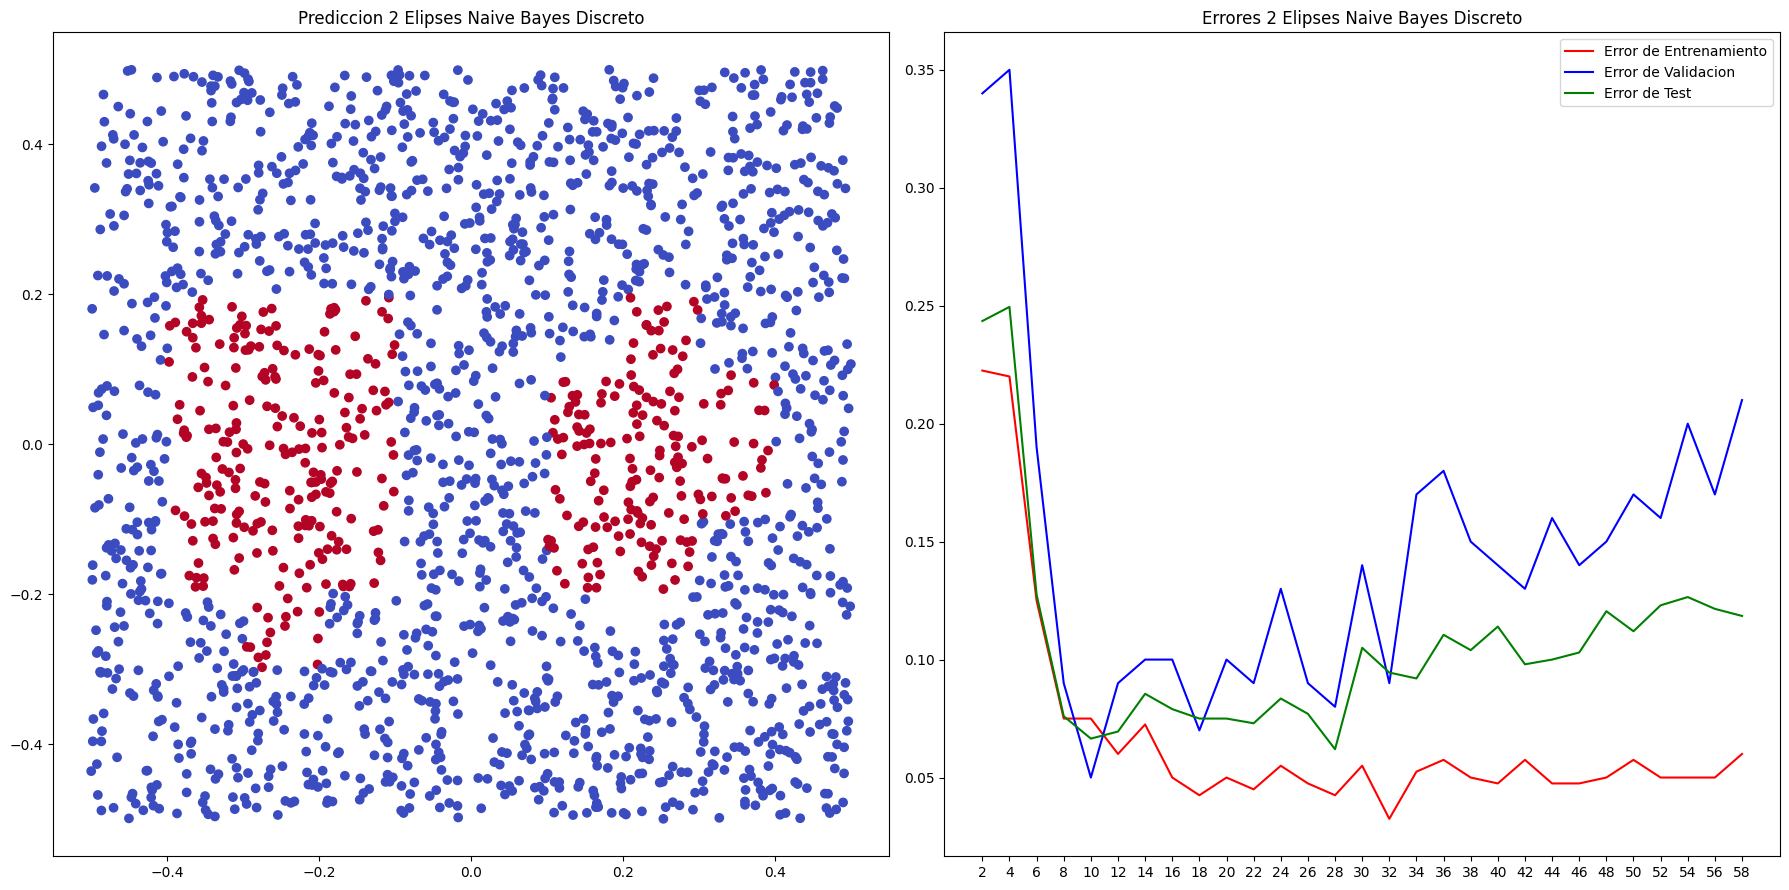

In [87]:
best_bayes, best_disc, error_train, error_val, error_test = entrenar_bayes_disc(X_train, y_train, X_val, y_val, X_test, y_test, bins_list)

fig, axs = plt.subplots(1, 2, figsize=(18, 9))

ax = axs[0]
ax.scatter(X_test['dim_0'], X_test['dim_1'], c=best_bayes.predict(best_disc.transform(X_test)), cmap='coolwarm')
ax.set_title(f'Prediccion 2 Elipses Naive Bayes Discreto')

ax = axs[1]
bayes_plot_errors(ax, error_train, error_val, error_test, bins_list, 'Errores 2 Elipses Naive Bayes Discreto')

plt.tight_layout()
plt.show()

In [88]:
espiralesTrain = espirales(600)
espiralesTest = espirales(2000)

X = espiralesTrain.drop(columns=['class'])
y = espiralesTrain['class']

X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)

X_test = espiralesTest.drop(columns=['class'])
y_test = espiralesTest['class']

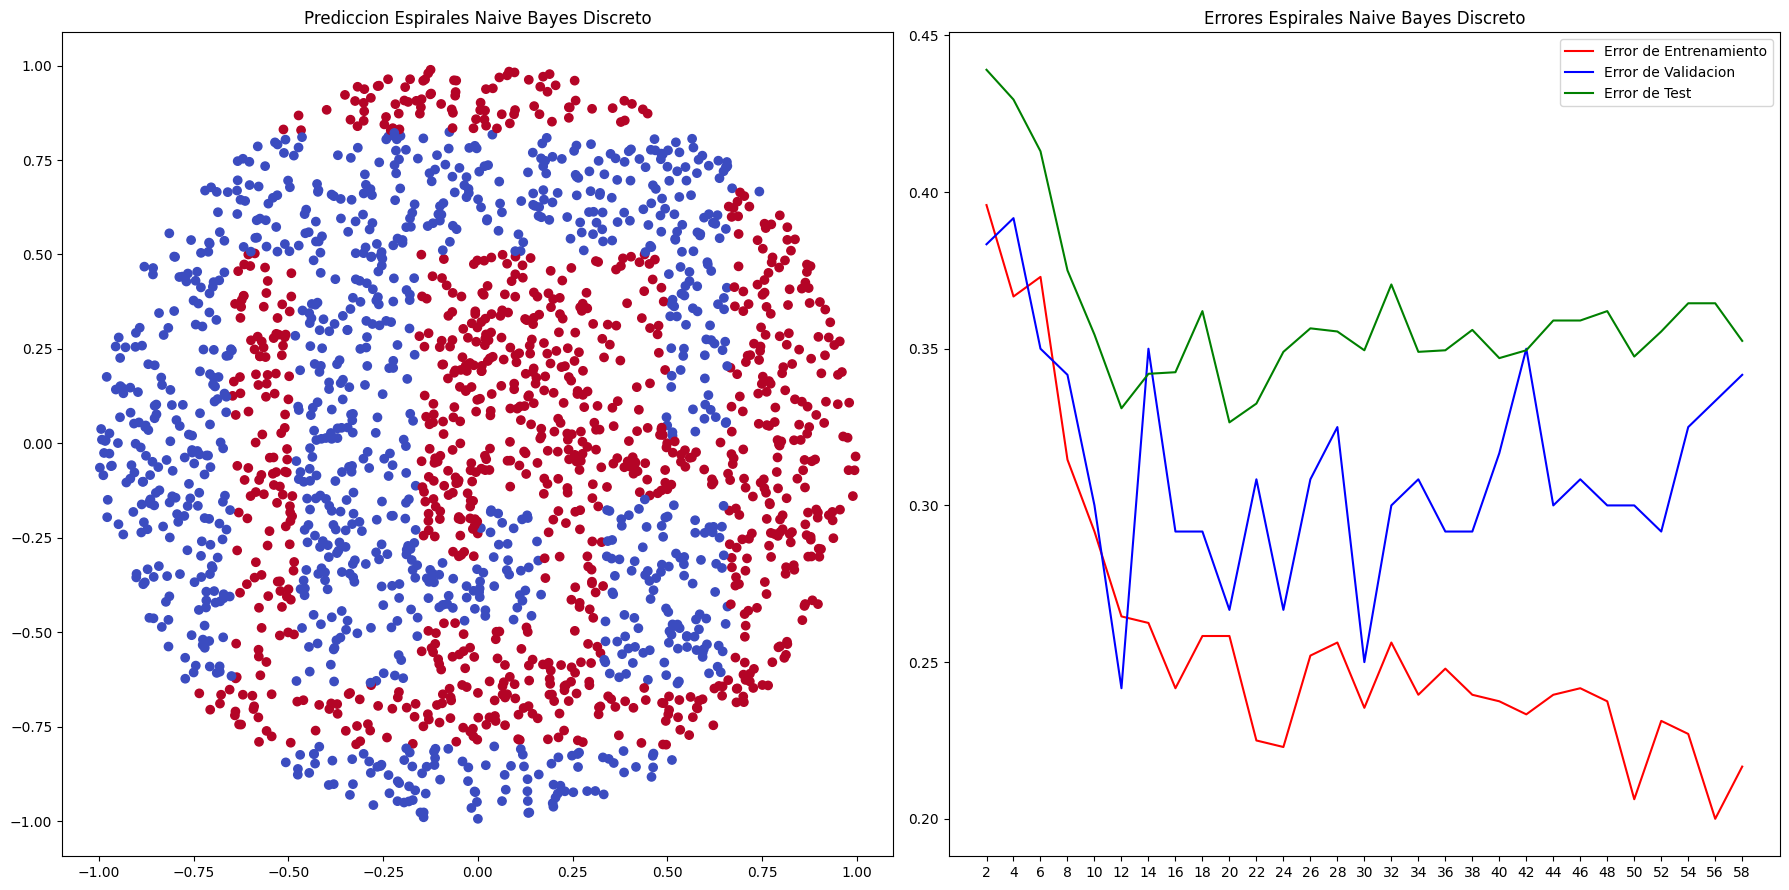

In [89]:
best_bayes, best_disc, error_train, error_val, error_test = entrenar_bayes_disc(X_train, y_train, X_val, y_val, X_test, y_test, bins_list)

fig, axs = plt.subplots(1, 2, figsize=(18, 9))

ax = axs[0]
ax.scatter(X_test['dim_0'], X_test['dim_1'], c=best_bayes.predict(best_disc.transform(X_test)), cmap='coolwarm')
ax.set_title(f'Prediccion Espirales Naive Bayes Discreto')

ax = axs[1]
bayes_plot_errors(ax, error_train, error_val, error_test, bins_list, 'Errores Espirales Naive Bayes Discreto')

plt.tight_layout()
plt.show()